<a href="https://colab.research.google.com/github/mosdef-hub/FOMMS-workshop/blob/main/SimpleExample_mosdef_cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRELIMINARY
This notebook is an attempt to install and use mosdef packages with google colab using package [conda-colab](https://github.com/conda-incubator/condacolab)

In [ ]:
!python --version # Initial version


Python 3.7.13


In [ ]:
!pip install condacolab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:32
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
ENVIRONMENT_YML_TEMPLATE = """
name: mosdef-google-colab
channels: 
  - conda-forge
dependencies:
  - mbuild
  - foyer
  - gmso
  - nglview
  - mosdef_cassandra
  - py3dmol
  - matplotlib
"""

with open("environment.yml", 'w') as env_file:
  env_file.write(ENVIRONMENT_YML_TEMPLATE)

!cat environment.yml


name: mosdef-google-colab
channels: 
  - conda-forge
dependencies:
  - mbuild
  - foyer
  - gmso
  - nglview
  - mosdef_cassandra
  - py3dmol


## Create Environment

Install `mbuild`, `foyer` and `gmso`.

In [ ]:
!mamba env update -n base --file environment.yml

conda-forge/linux-64     [] (00m:00s) 
conda-forge/linux-64     [] (00m:00s) 289 KB / ?? (953.68 KB/s)
conda-forge/linux-64     [] (00m:00s) 289 KB / ?? (953.68 KB/s)
conda-forge/noarch       [] (00m:00s) 
conda-forge/linux-64     [] (00m:00s) 289 KB / ?? (953.68 KB/s)
conda-forge/noarch       [] (00m:00s) 20 KB / ?? (66.79 KB/s)
conda-forge/linux-64     [] (00m:00s) 289 KB / ?? (953.68 KB/s)
conda-forge/noarch       [] (00m:00s) 20 KB / ?? (66.79 KB/s)
conda-forge/linux-64     [] (00m:00s) 976 KB / ?? (2.10 MB/s)
conda-forge/noarch       [] (00m:00s) 20 KB / ?? (66.79 KB/s)
conda-forge/linux-64     [] (00m:00s) 976 KB / ?? (2.10 MB/s)
conda-forge/noarch       [] (00m:00s) 20 KB / ?? (66.79 KB/s)
conda-forge/linux-64     [] (00m:00s) 976 KB / ?? (2.10 MB/s)
conda-forge/noarch       [] (00m:00s) 750 KB / ?? (1.61 MB/s)
conda-forge/linux-64     [] (00m:00s) 976 KB / ?? (2.10 MB/s)
conda-forge/noarch       [] (00m:00s) 750 KB / ?? (1.61 MB/s)
conda-forge/linux-64     [] (00m:00s) 2 MB / ?

In [ ]:
!python --version

Python 3.7.10


## Example Workflow



## Import the required packages

In [ ]:
import mbuild as mb
from foyer import Forcefield
from mbuild.lib.recipes.polymer import Polymer
import unyt as u

import mosdef_cassandra as mc

In [ ]:
from google.colab import output  ## Enable Custom Widgets
output.enable_custom_widget_manager()

### Mol2 Files for Ethane and Propane

In [ ]:
ETHANE = """@<TRIPOS>MOLECULE
ETH
    2    1    1    0    0
SMALL
NO_CHARGES
****
Energy = 0

@<TRIPOS>ATOM
      1  _CH3       0.0000    0.0000    0.0000    C    1  ETH        0.000000
      2  _CH3      -1.5400    0.0000    0.0000    C    1  ETH        0.000000
@<TRIPOS>BOND
    1     1     2  1

@<TRIPOS>SUBSTRUCTURE
1 ****        1 TEMP                        0 ****  **** 0 ROOT

#generated by VMD
"""

PROPANE = """@<TRIPOS>MOLECULE
PRO
    3    2    1    0    0
SMALL
NO_CHARGES
****
Energy = 0

@<TRIPOS>ATOM
      1  _CH3       0.0000    0.0000    0.0000    C    1  PRO        0.000000
      2  _CH2      -1.5400    0.0000    0.0000    C    1  PRO        0.000000
      3  _CH3      -3.0800    0.0000    0.0000    C    1  PRO        0.000000
@<TRIPOS>BOND
    1     1     2  1
    2     2     3  1

@<TRIPOS>SUBSTRUCTURE
1 ****        1 TEMP                        0 ****  **** 0 ROOT

#generated by VMD
"""

with open("ethane.mol2", "w") as ethane_mol2:
  ethane_mol2.write(ETHANE)

with open("propane.mol2", "w") as propane_mol2:
  propane_mol2.write(PROPANE)

In [ ]:
! cat ethane.mol2
! echo $'\n======================================\n'
! cat propane.mol2

@<TRIPOS>MOLECULE
ETH
    2    1    1    0    0
SMALL
NO_CHARGES
****
Energy = 0

@<TRIPOS>ATOM
      1  _CH3       0.0000    0.0000    0.0000    C    1  ETH        0.000000
      2  _CH3      -1.5400    0.0000    0.0000    C    1  ETH        0.000000
@<TRIPOS>BOND
    1     1     2  1

@<TRIPOS>SUBSTRUCTURE
1 ****        1 TEMP                        0 ****  **** 0 ROOT

#generated by VMD


@<TRIPOS>MOLECULE
PRO
    3    2    1    0    0
SMALL
NO_CHARGES
****
Energy = 0

@<TRIPOS>ATOM
      1  _CH3       0.0000    0.0000    0.0000    C    1  PRO        0.000000
      2  _CH2      -1.5400    0.0000    0.0000    C    1  PRO        0.000000
      3  _CH3      -3.0800    0.0000    0.0000    C    1  PRO        0.000000
@<TRIPOS>BOND
    1     1     2  1
    2     2     3  1

@<TRIPOS>SUBSTRUCTURE
1 ****        1 TEMP                        0 ****  **** 0 ROOT

#generated by VMD


## Load Files
Import a ethane and propane mol2 file for the TraPPE-UA force field, which will be modified allowing the creation of an alkane with of chosen length to it until we reach pentane.  However, any length of an alkane > propane can be created with this example.

### Select 

In [ ]:
ethane_mol2_path = 'ethane.mol2'
propane_mol2_path = 'propane.mol2'


ethane_comp = mb.load(ethane_mol2_path) # Get the ethane mol2 file
propane_comp = mb.load(propane_mol2_path) # Get the propane mol2 file

propane_comp.visualize(backend="nglview")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Building Butane:  Add the end groups where we will cap the beginning (head) and end (tail) of the molecule.

In [ ]:
n_butane = Polymer()


n_butane.add_monomer(compound=propane_comp,
                     indices= [0,-1],
                     separation=0.154,
                     replace=True, 
                     #orientation=[-1,None]
                    )

n_butane.add_end_groups(ethane_comp, 
                        index=0, 
                        separation=0.154, 
                        label="head", 
                        duplicate=False
                       )

n_butane.add_end_groups(ethane_comp, 
                        index=0, 
                        separation=0.154, 
                        label="tail", 
                        duplicate=False
                       )

number_of_carbons = 4 # minimum allowable=3  

n_butane.build(n=number_of_carbons-2, sequence='A') # n=number_of_carbons-(head and tail cap)
n_butane.name = 'BUT'

n_butane.visualize(show_ports=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Building Pentane:  Add the end groups where we will cap the beginning (head) and end (tail) of the molecule.

In [ ]:
n_penane = Polymer()


n_penane.add_monomer(compound=propane_comp,
                     indices= [0,-1],
                     separation=0.154,
                     replace=True, 
                     #orientation=[-1,None]
                    )

n_penane.add_end_groups(ethane_comp, 
                        index=0, 
                        separation=0.154, 
                        label="head", 
                        duplicate=False
                       )

n_penane.add_end_groups(ethane_comp, 
                        index=0, 
                        separation=0.154, 
                        label="tail", 
                        duplicate=False
                       )

number_of_carbons = 5 # minimum allowable=3  

n_penane.build(n=number_of_carbons-2, sequence='A') # n=number_of_carbons-(head and tail cap)
n_penane.name = 'PEN'

n_penane.visualize(show_ports=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Build a box of pentane and minimize the box using the TraPPE-UA force field

In [ ]:
seed_no = 12345
No_molecules_in_box = 150
cubic_box_length_nm = 3.2
force_field = 'trappe-ua'
    
pentane_box_liq = mb.fill_box(compound=[n_penane],
                              n_compounds=[int(No_molecules_in_box)],
                              box=[cubic_box_length_nm,
                                   cubic_box_length_nm,
                                   cubic_box_length_nm
                                  ],
                              seed=seed_no,
                              edge=0.2
                             )
pentane_box_liq.energy_minimize(forcefield=force_field,
                                steps=10 ** 5
                               )

pentane_box_liq.visualize(show_ports=True)

/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _CH4
  "Creating custom element for {}".format(element)
/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _CH3
  "Creating custom element for {}".format(element)
/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _CH2
  "Creating custom element for {}".format(element)
/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _HC
  "Creating custom element for {}".format(element)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Set up the Cassandra Simulations

In [ ]:
# Load forcefields
trappe = Forcefield(name="trappe-ua")

# Use foyer to apply forcefields
typed_pentane = trappe.apply(n_penane)

# Create box and species list
box_list = [pentane_box_liq]
system = mc.System(box_list, species_list, mols_in_boxes=mols_in_boxes)
moveset = mc.MoveSet("npt", species_list)

moveset.prob_volume = 0.010

species_list = [typed_pentane]

mols_in_boxes = [[No_molecules_in_box]]

system = mc.System(box_list, species_list, mols_in_boxes=mols_in_boxes)
moveset = mc.MoveSet("npt", species_list)

moveset.prob_volume = 0.010

thermo_props = [
    "energy_total",
    "energy_intervdw",
    "pressure",
    "volume",
    "nmols",
    "mass_density",
]

custom_args = {
    "run_name": "equil",
    "charge_style": "none",
    "rcut_min": 2.0 * u.angstrom,
    "vdw_cutoff": 14.0 * u.angstrom,
    "units": "sweeps",
    "steps_per_sweep": 450,
    "coord_freq": 50,
    "prop_freq": 10,
    "properties": thermo_props,
}


mc.run(
    system=system,
    moveset=moveset,
    run_type="equilibration",
    run_length=2400,
    pressure=14.02 * u.bar,
    temperature=372 * u.K,
    **custom_args,
)

/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _CH4
  "Creating custom element for {}".format(element)
/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _CH3
  "Creating custom element for {}".format(element)
/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _CH2
  "Creating custom element for {}".format(element)
/usr/local/lib/python3.7/site-packages/foyer/forcefield.py:667: UserWarning: Non-atomistic element type detected. Creating custom element for _HC
  "Creating custom element for {}".format(element)


Using the following executables for Cassandra:
Python: /usr/local/bin/python
library_setup: /usr/local/bin/library_setup.py
Cassandra: /usr/local/bin/cassandra.exe
Generating fragment libraries...


/usr/local/lib/python3.7/site-packages/mbuild/formats/cassandramcf.py:119: UserWarning: Unable to infer coulombic 1-4 scaling factor. Setting to 0.0
  "{:.1f}".format(coul14)
/usr/local/lib/python3.7/site-packages/mbuild/formats/cassandramcf.py:156: UserWarning: Unable to infer LJ 1-4 scaling factor. Setting to 0.0
  "{:.1f}".format(lj14)


Running Cassandra...


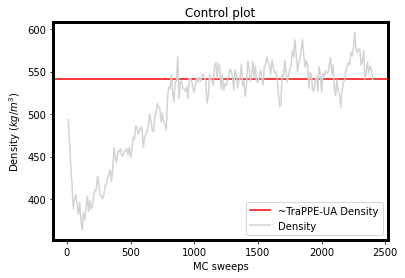

In [ ]:
import numpy as np
import pylab as plt

data = np.genfromtxt("equil.out.prp", skip_header=3)

plt.rcParams['font.family'] = "DIN Alternate"
font = {'family' : 'DIN Alternate',
        'weight' : 'normal',
        'size'   : 12}

fig, ax = plt.subplots(1, 1)

ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)

ax.title.set_text('Control plot')
ax.set_xlabel(r'MC sweeps')
ax.set_ylabel('Density $(kg / m{^3})$')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
ax.axhline(y=541, color='r', linestyle='-', label='~TraPPE-UA Density')

ax.plot(data[:, 0], data[:,-1], "-", color='lightgray', label='Density')
ax.legend(loc="best")
plt.show()